# **Retinanet installation**

**Requisitos**

In [ ]:
!pip install tensorflow==2.3

In [ ]:
!pip install keras==2.4.3

In [ ]:
!python --version

Python 3.7.13


In [ ]:
!git clone https://github.com/fizyr/keras-retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6209, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6209 (delta 0), reused 2 (delta 0), pack-reused 6205
Receiving objects: 100% (6209/6209), 13.48 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
%cd keras-retinanet

/content/keras-retinanet


In [ ]:
!pip install . 

In [ ]:
!python setup.py build_ext --inplace

In [ ]:
import os
import tensorflow as tf

###set 0 for GPU and -1 for CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


In [ ]:
!PYTHONPATH='.' python /content/keras-retinanet/keras_retinanet/bin/train.py

In [ ]:
#Training

!retinanet-train --freeze-backbone --backbone resnet50 --random-transform \
--weights /content/drive/MyDrive/TEC/Research/Hemocare/resnet50_coco_best_v2.1.0.h5 \
--batch-size 8 --steps 45 --epochs 10 --compute-val-loss --lr 1e-4 \
--snapshot-path /content/drive/MyDrive/TEC/Research/Hemocare/snapshot \
csv /content/drive/MyDrive/TEC/Research/Hemocare/train_annotations2.csv \
/content/drive/MyDrive/TEC/Research/Hemocare/clases.csv 

2022-04-04 19:38:06.201571: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2022-04-04 19:38:07.914126: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-04-04 19:38:07.920039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 19:38:07.920588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-04-04 19:38:07.920619: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-04-04 19:38:07.922490: I t

In [ ]:
#Conversion
!retinanet-convert-model /content/drive/MyDrive/TEC/Research/Hemocare/snapshot/resnet50_csv_01.h5 \
/content/drive/MyDrive/TEC/Research/Hemocare/pesos01_wbc.h5

2022-03-17 19:01:25.348251: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-17 19:01:27.296270: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-17 19:01:27.302219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 19:01:27.302991: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-03-17 19:01:27.303041: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-17 19:01:27.305153: I tensorflow/stream_executor/platform/defa

In [ ]:
#Evaluation
!retinanet-evaluate csv /content/drive/MyDrive/TEC/Research/Hemocare/train_annotations2.csv /content/drive/MyDrive/TEC/Research/Hemocare/clases.csv /content/drive/MyDrive/TEC/Research/Hemocare/pesos01_wbc.h5

2022-03-17 19:01:44.771753: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading model, this may take a second...
2022-03-17 19:01:47.485624: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-17 19:01:47.491116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 19:01:47.491857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-03-17 19:01:47.491902: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-17 19:01:47.493983: I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
processing time:  5.1020355224609375
RBC
1
RBC
1


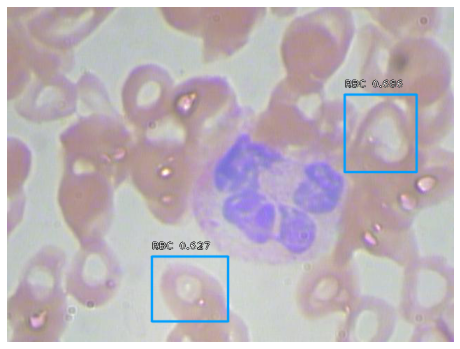

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#from keras_retinanet.keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time


# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
#setup_gpu(gpu)

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases

#model_path = os.path.join('..', 'weights', 'resnet50_csv_04.h5')
model_path = "/content/drive/MyDrive/TEC/Research/Hemocare/pesos01_wbc.h5"

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {
    'Platelets': 0,
    'RBC': 1,
    'WBC': 2
    }

# load image
image = read_image_bgr('/content/drive/MyDrive/TEC/Research/Hemocare/images/BloodImage_00000.jpg')


# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5893:
    #if score < 0.2:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    predicted_label = list(labels_to_names.keys())[list(labels_to_names.values()).index(label)]
    print(predicted_label)
    print(label)
    #caption = "{} {:.3f}".format(labels_to_names[label], score)
    caption = "{} {:.3f}".format(predicted_label, score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(draw)
plt.show()